# Two-phase momentum advection verification: translating inviscid droplet without surface tension 

![title](translating-droplet-figures/translating-droplet-3D-standalone-1.png)

A droplet is translated in a rectangular domain using a spatially constant internal and inlet velocity field. Length dimensions are in meters.

### Goal: Ensure the advection of the interface is consistent with the advection of the momentum

Advecting the two-phase momentum with a prescribed velocity $\mathbf{v}$ is modeled as

$\partial_t (\rho \mathbf{v}) + \nabla \cdot (\rho\mathbf{v}\mathbf{v}) = 0$

with $\mathbf{v} = \text{const} = \mathbf{v}_c = \mathbf{v}_f$ on the boundary and inside the solution domain. If discretized explicitly using Euler temporal discretization $\mathbf{v}=\text{const}$ gives 

$\mathbf{v}_c^{n+1} = \frac{\mathbf{v}_c^n(\rho_c^n - \frac{\Delta t}{|\Omega_c|}\sum_{f \in F_c}\rho_f^n \mathbf{v}_f^n\cdot \mathbf{S}_f)}{\rho_c^{n+1}}$

Since the passive transport of the droplet without viscous, hydrostatic, and surface tension forces (any forces for that matter) working on it, should not cause the accelleration of the fluid, $\mathbf{v}_c^{n+1} = \mathbf{v}_c^{n}$, so 

$\rho_c^{n+1} =\rho_c^n - \frac{\Delta t}{|\Omega_c|}\sum_{f \in F_c}\rho_f^n \mathbf{v}_f^n\cdot \mathbf{S}_f$ 

**which means the cell-centered densities must be updated using the same face-centered momentum flux $\rho_f^n \mathbf{v}_f^n\cdot \mathbf{S}_f$ - this is the momentum flux consistency requirement for the conservative formulation of the momentum equation in the single-field Navier-Stokes equations.**

**If the numerical method does not satisfy this condition, passive transport of a droplet causes artificial accelerations.**

**The accellerations appear as a source-term on the r.h.s. of the pressure equation - that drives $\nabla_c \cdot \mathbf{v}_c^{n+1} = 0$**

In [1]:
import dataframeWithMetadata as dfmd
import dataAgglomeration as da
import sys
import os
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 400
sys.path.append(os.environ['ARGO_PYTHON_MODULES'])
if (not(os.path.exists('figures'))):
    os.mkdir('figures')
    
def plot_density_ratio_dframe(dframe):
    """Plots the temporal evolution of the L-INFINITY velocity error norm for each mesh resolution and density ratio."""
    
    resolutions = dframe.index.get_level_values("resolution").unique()
    
    for resolution in resolutions:
        df_subset = dframe.loc[resolution,:]
        plt.plot(df_subset["time"], df_subset["Linf velocity error"], 
                 label="RESOLUTION:%s" % (resolution))
    plt.ylabel("$L_{\infty}(\|\mathbf{v}_c^e - \mathbf{v}_c^n\|)$")
    plt.xlabel("Time in seconds")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)

## Mercury droplet in air 
### The 'interIsoFoam' solver

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[['boundary_R0p5_H2_C0p50p5.stl'], [0.000250001], [0.00050007], [0.0006250003], [0.0006250001], [0.1], [16, 32, 64], [0.01], [0.0], [0.0], [1.1839], [0.0], [13533.6], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['surface_file', 'radius', 'z_centre', 'y_centre', 'x_centre', 'end_time', 'resolution', 'z_velocity', 'surface_tension_coefficient', 'nu_ambient', 'rho_ambient', 'nu_droplet', 'rho_droplet', 'step']


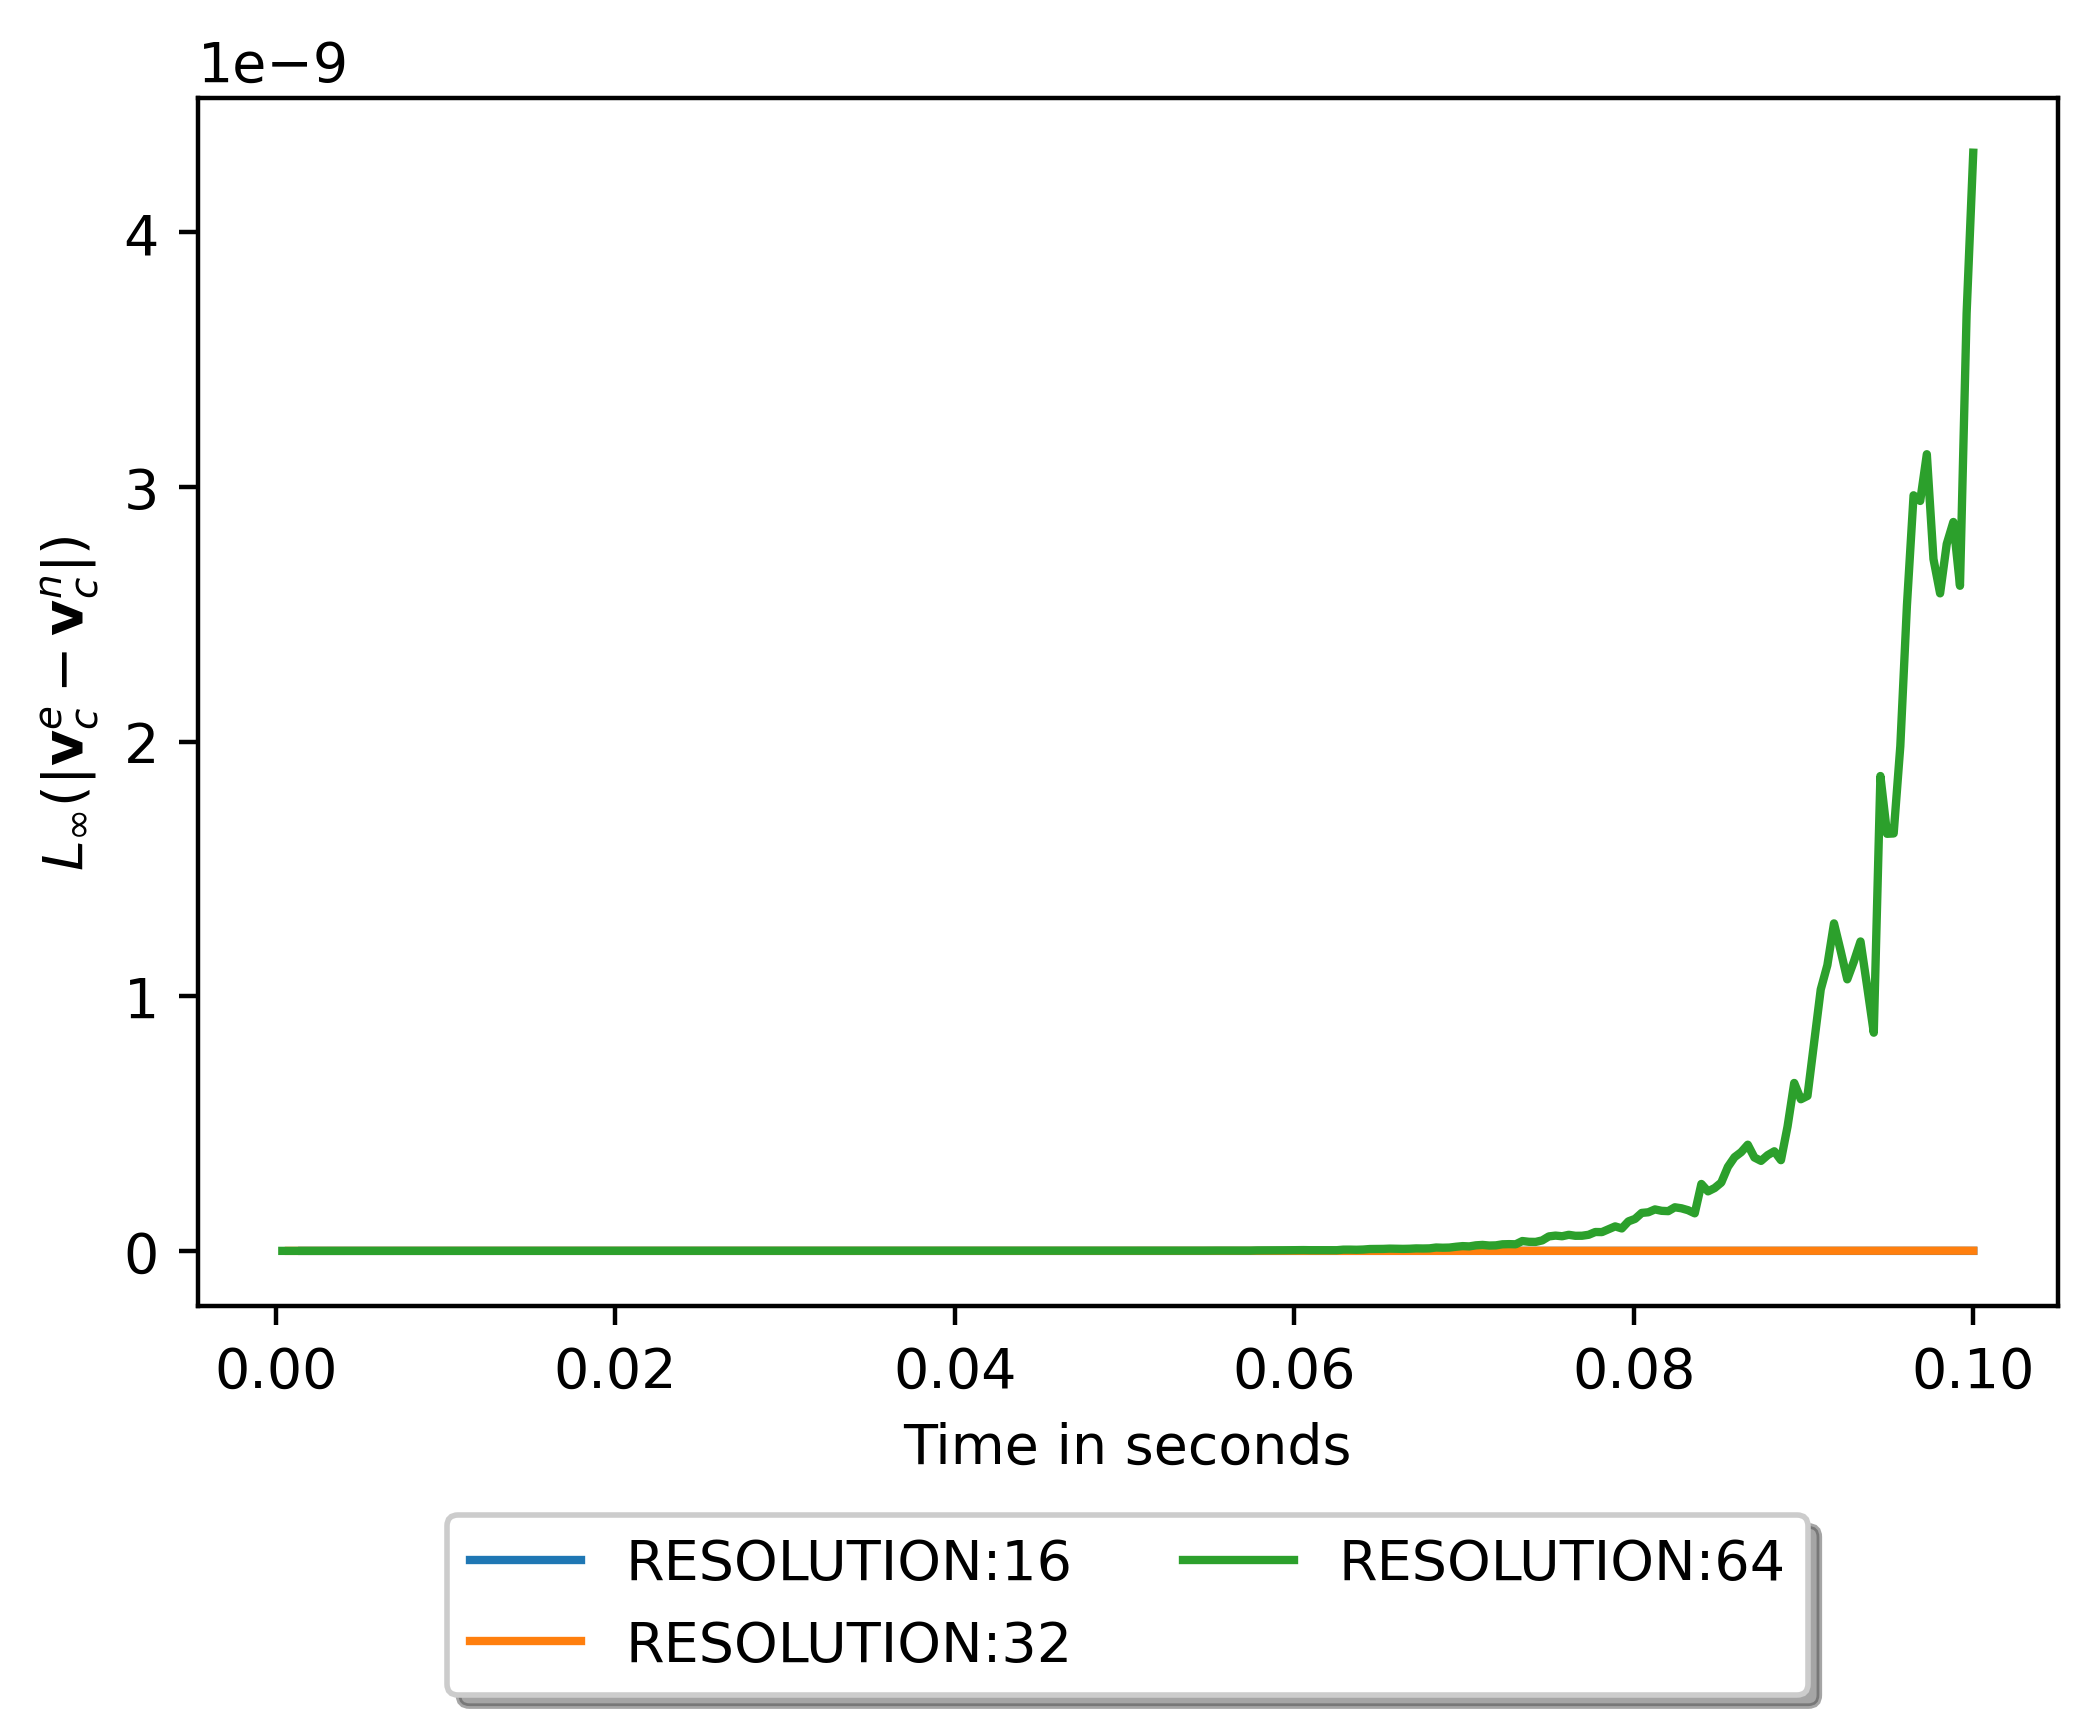

In [2]:
agglomerator = da.data_agglomerator("mercuryAirDropletTranslation.parameter","stationaryDropletResults.csv", 
                                     directory_pattern="interIsoFoam-mercuryAirDropletTranslation_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("interIsoFoam.mercuryAirDropletTranslation.csv")
dframe = agglomerator.study_dataframe()
plot_density_ratio_dframe(dframe)

### The 'interIsoRhoFoam' solver

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[['boundary_R0p5_H2_C0p50p5.stl'], [0.000250001], [0.00050007], [0.0006250003], [0.0006250001], [0.1], [16, 32, 64], [0.01], [0.0], [0.0], [1.1839], [0.0], [13533.6], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['surface_file', 'radius', 'z_centre', 'y_centre', 'x_centre', 'end_time', 'resolution', 'z_velocity', 'surface_tension_coefficient', 'nu_ambient', 'rho_ambient', 'nu_droplet', 'rho_droplet', 'step']


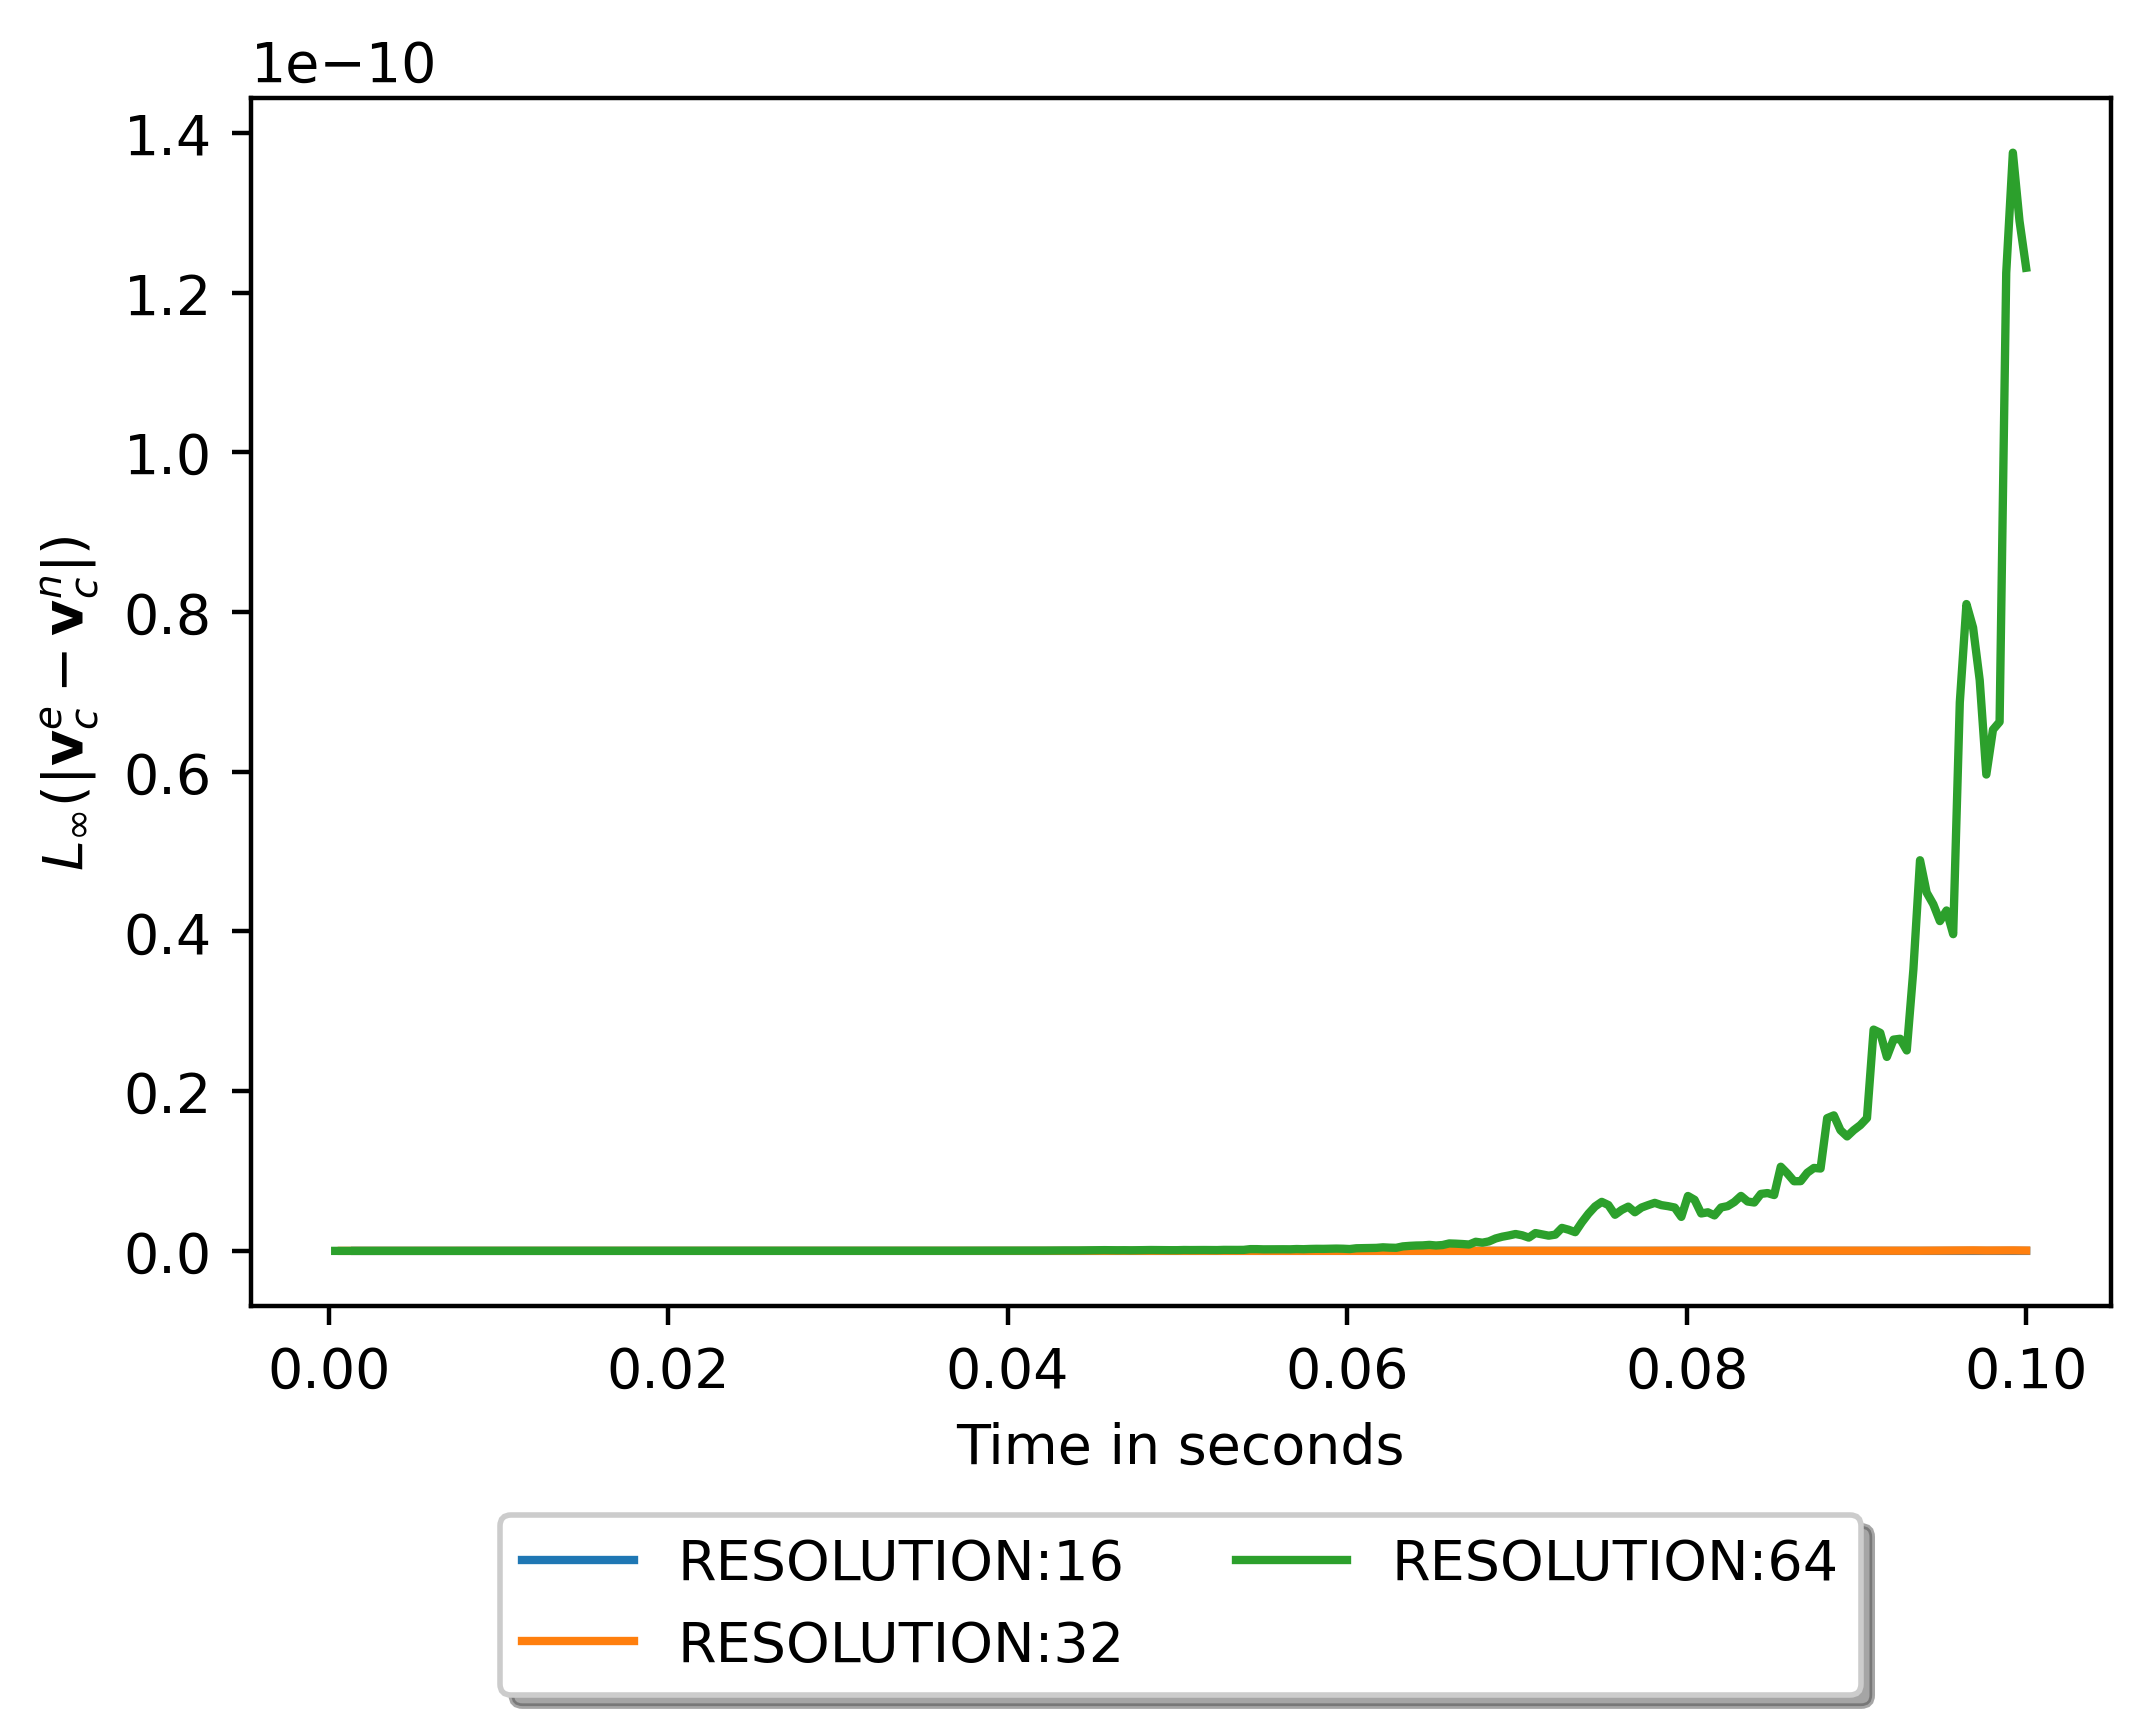

In [3]:
agglomerator = da.data_agglomerator("mercuryAirDropletTranslation.parameter","stationaryDropletResults.csv", 
                                     directory_pattern="interIsoRhoFoam-mercuryAirDropletTranslation_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("interIsoRhoFoam.mercuryAirDropletTranslation.csv")
dframe = agglomerator.study_dataframe()
plot_density_ratio_dframe(dframe)

# Debugging, delete this cell:

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[['boundary_R0p5_H2_C0p50p5.stl'], [0.000250001], [0.00050007], [0.0006250003], [0.0006250001], [0.1], [16, 32, 64], [0.01], [0.0], [0.0], [1.1839], [0.0], [13533.6], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['surface_file', 'radius', 'z_centre', 'y_centre', 'x_centre', 'end_time', 'resolution', 'z_velocity', 'surface_tension_coefficient', 'nu_ambient', 'rho_ambient', 'nu_droplet', 'rho_droplet', 'step']


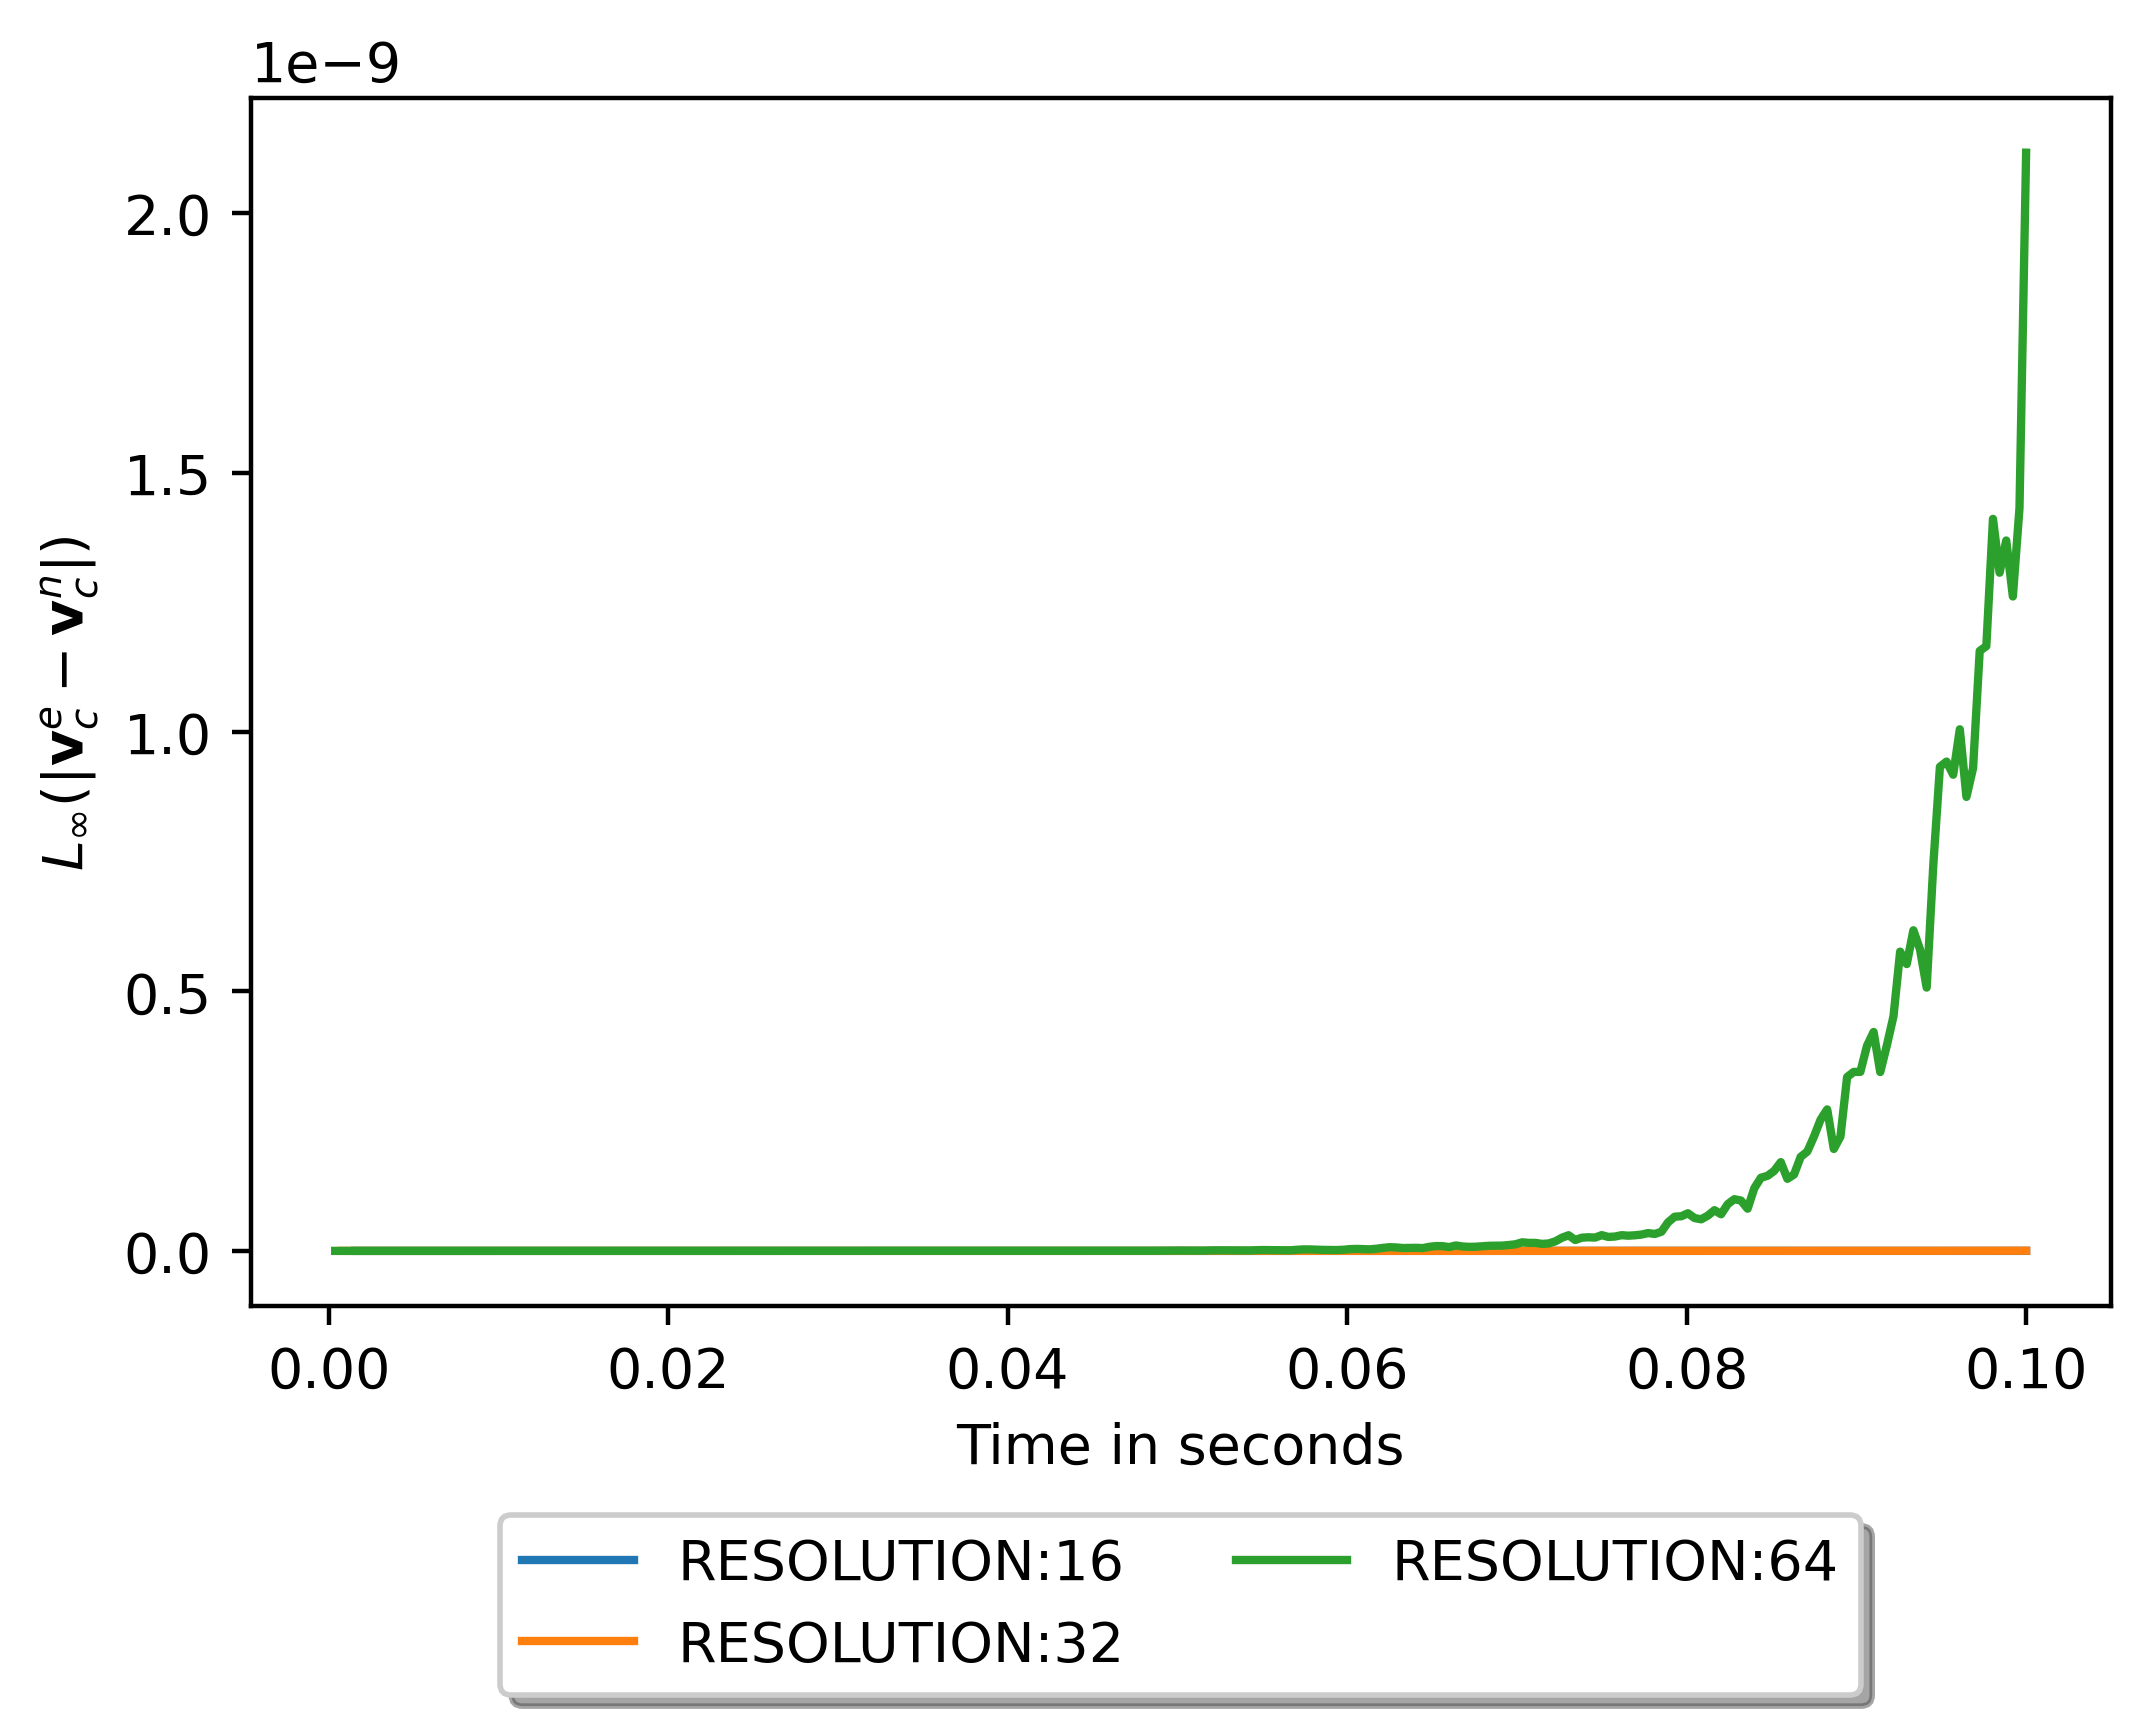

In [4]:
agglomerator = da.data_agglomerator("mercuryAirDropletTranslation.parameter","stationaryDropletResults.csv", 
                                     directory_pattern="interIsoFoam-withMomentumPredictor-mercuryAirDropletTranslation_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("interIsoFoam.momentumPredictor.mercuryAirDropletTranslation.csv")
dframe = agglomerator.study_dataframe()
plot_density_ratio_dframe(dframe)

## Debugging, delete cell

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[['boundary_R0p5_H2_C0p50p5.stl'], [0.000250001], [0.00050007], [0.0006250003], [0.0006250001], [0.1], [16, 32, 64], [0.01], [0.0], [0.0], [1.1839], [0.0], [13533.6], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['surface_file', 'radius', 'z_centre', 'y_centre', 'x_centre', 'end_time', 'resolution', 'z_velocity', 'surface_tension_coefficient', 'nu_ambient', 'rho_ambient', 'nu_droplet', 'rho_droplet', 'step']


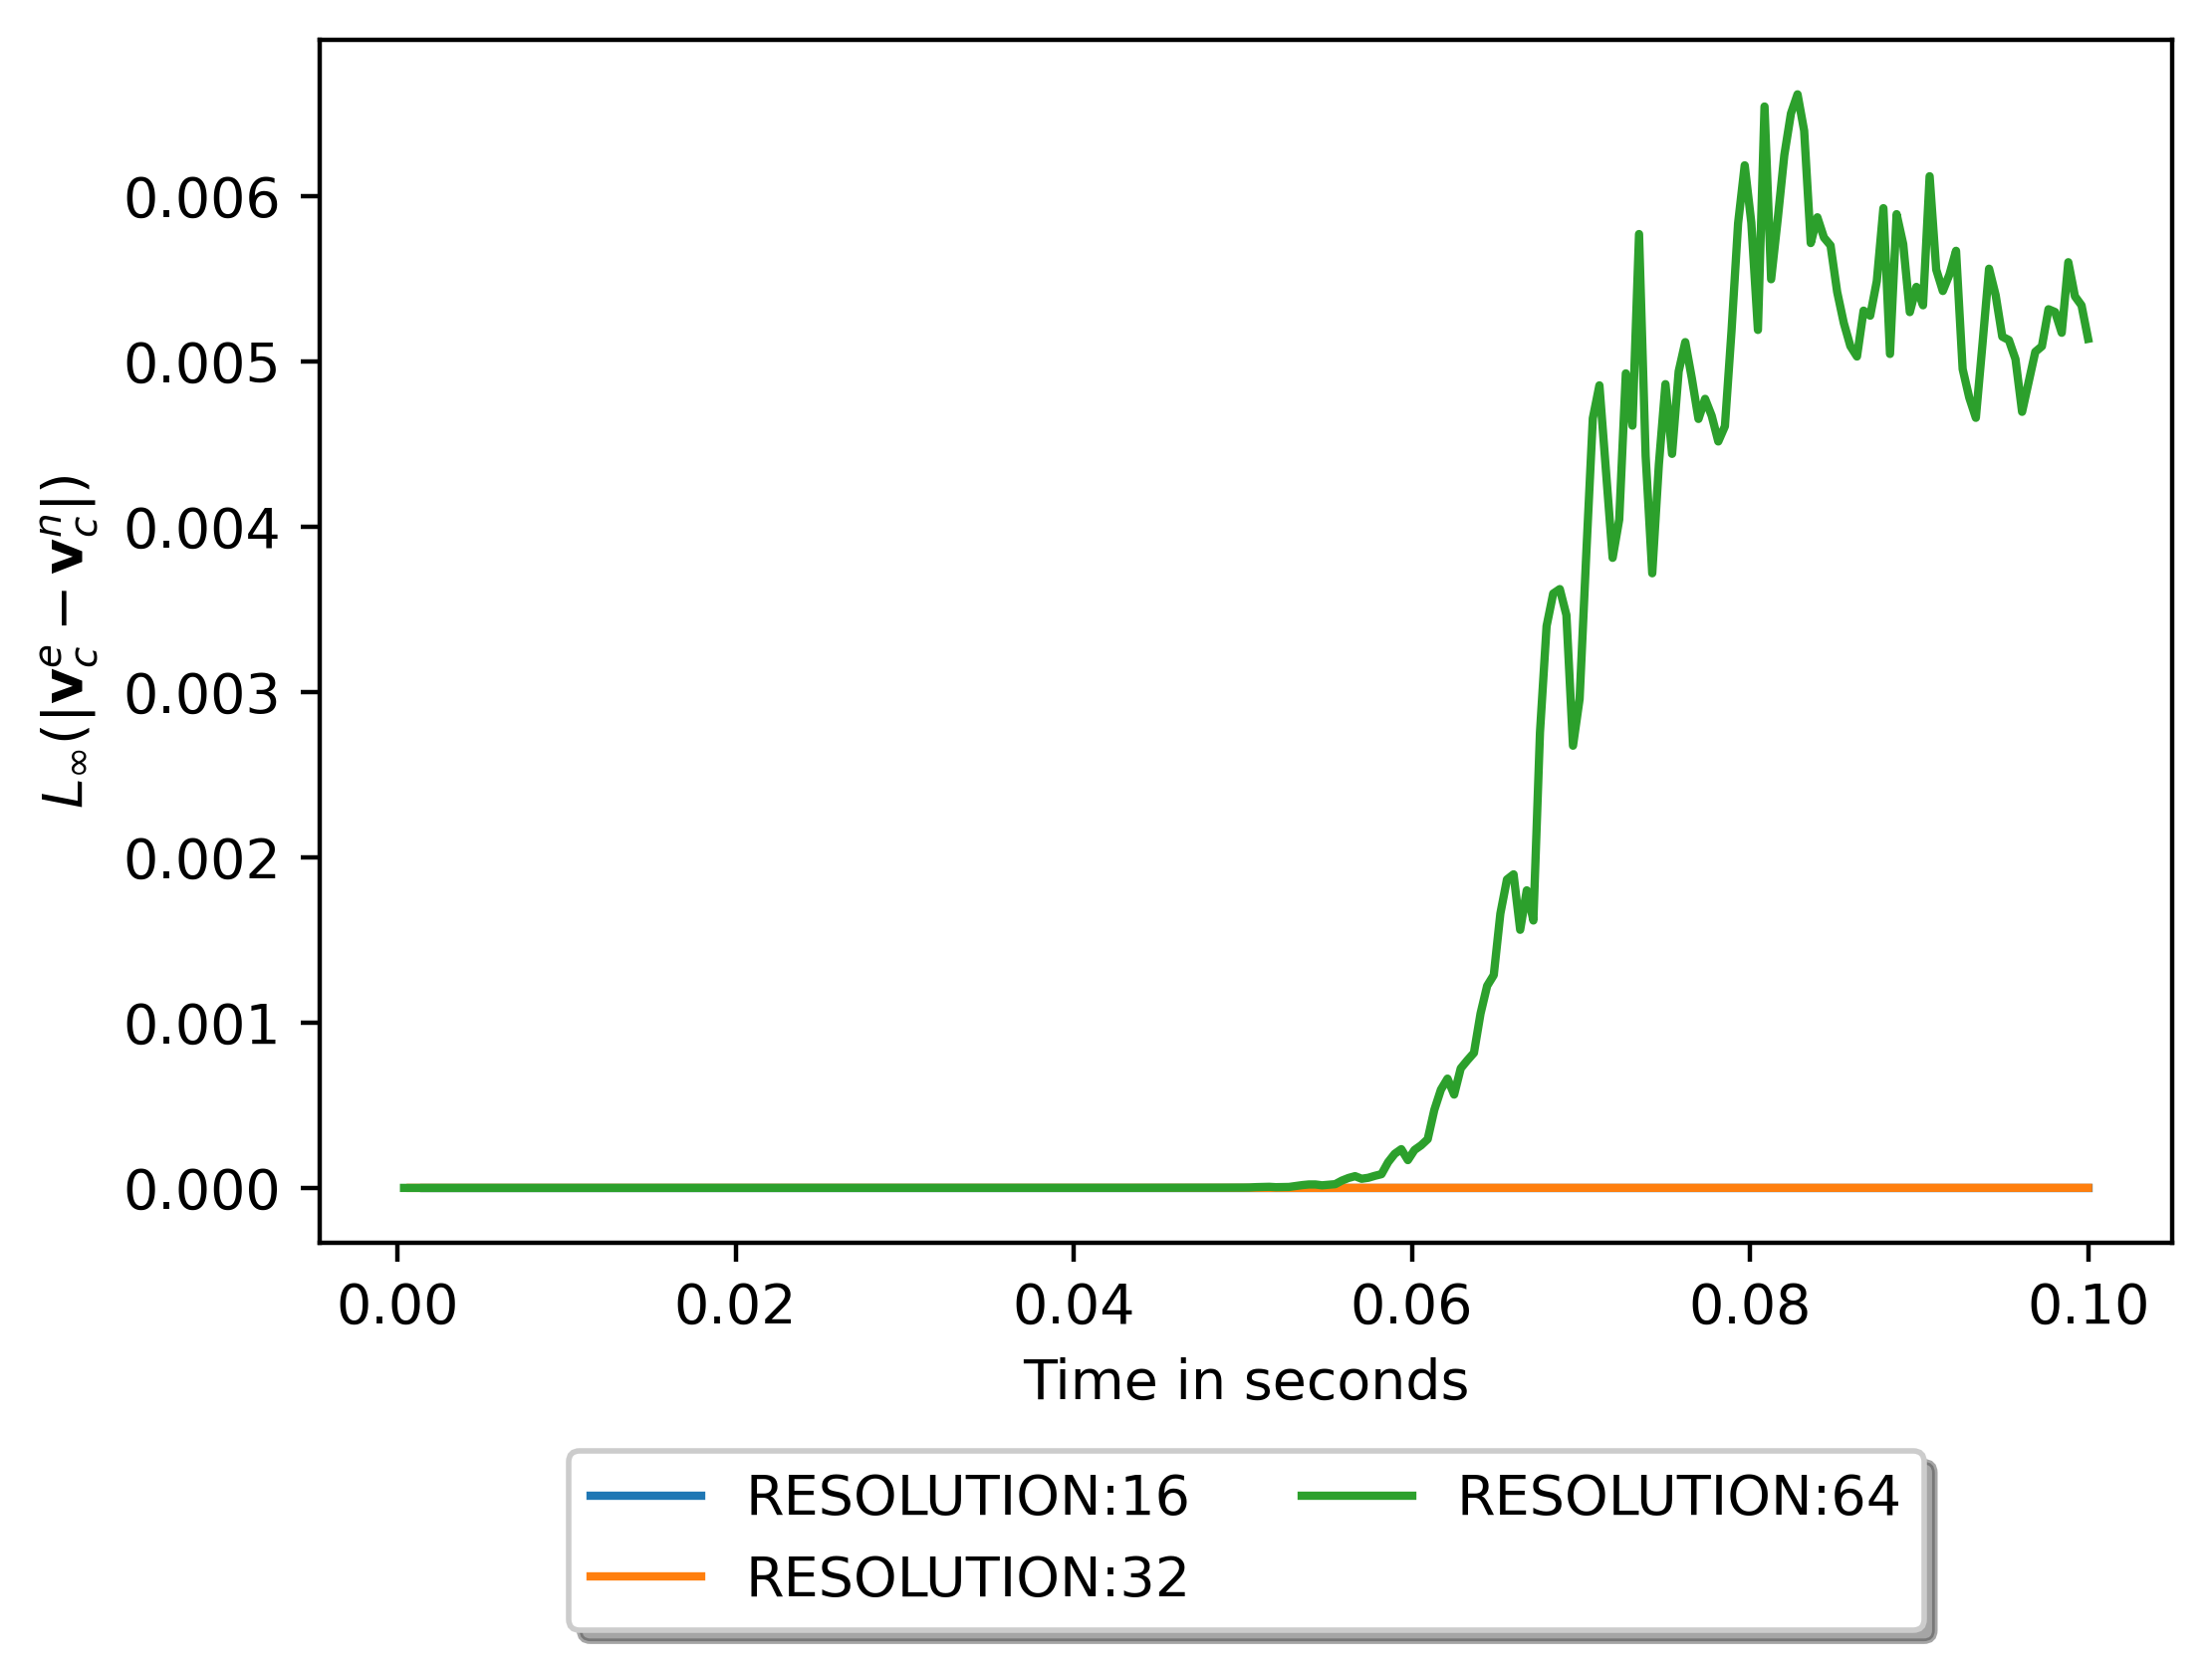

In [5]:
agglomerator = da.data_agglomerator("mercuryAirDropletTranslation.parameter","stationaryDropletResults.csv", 
                                     directory_pattern="interIsoFoam-divRhoU-gaussLinear-mercuryAirDropletTranslation_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("interIsoFoam.divRhoU-gaussLinear.mercuryAirDropletTranslation.csv")
dframe = agglomerator.study_dataframe()
plot_density_ratio_dframe(dframe)

## Debugging, delete cell

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[['boundary_R0p5_H2_C0p50p5.stl'], [0.000250001], [0.00050007], [0.0006250003], [0.0006250001], [0.1], [16, 32, 64], [0.01], [0.0], [0.0], [1.1839], [0.0], [13533.6], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['surface_file', 'radius', 'z_centre', 'y_centre', 'x_centre', 'end_time', 'resolution', 'z_velocity', 'surface_tension_coefficient', 'nu_ambient', 'rho_ambient', 'nu_droplet', 'rho_droplet', 'step']


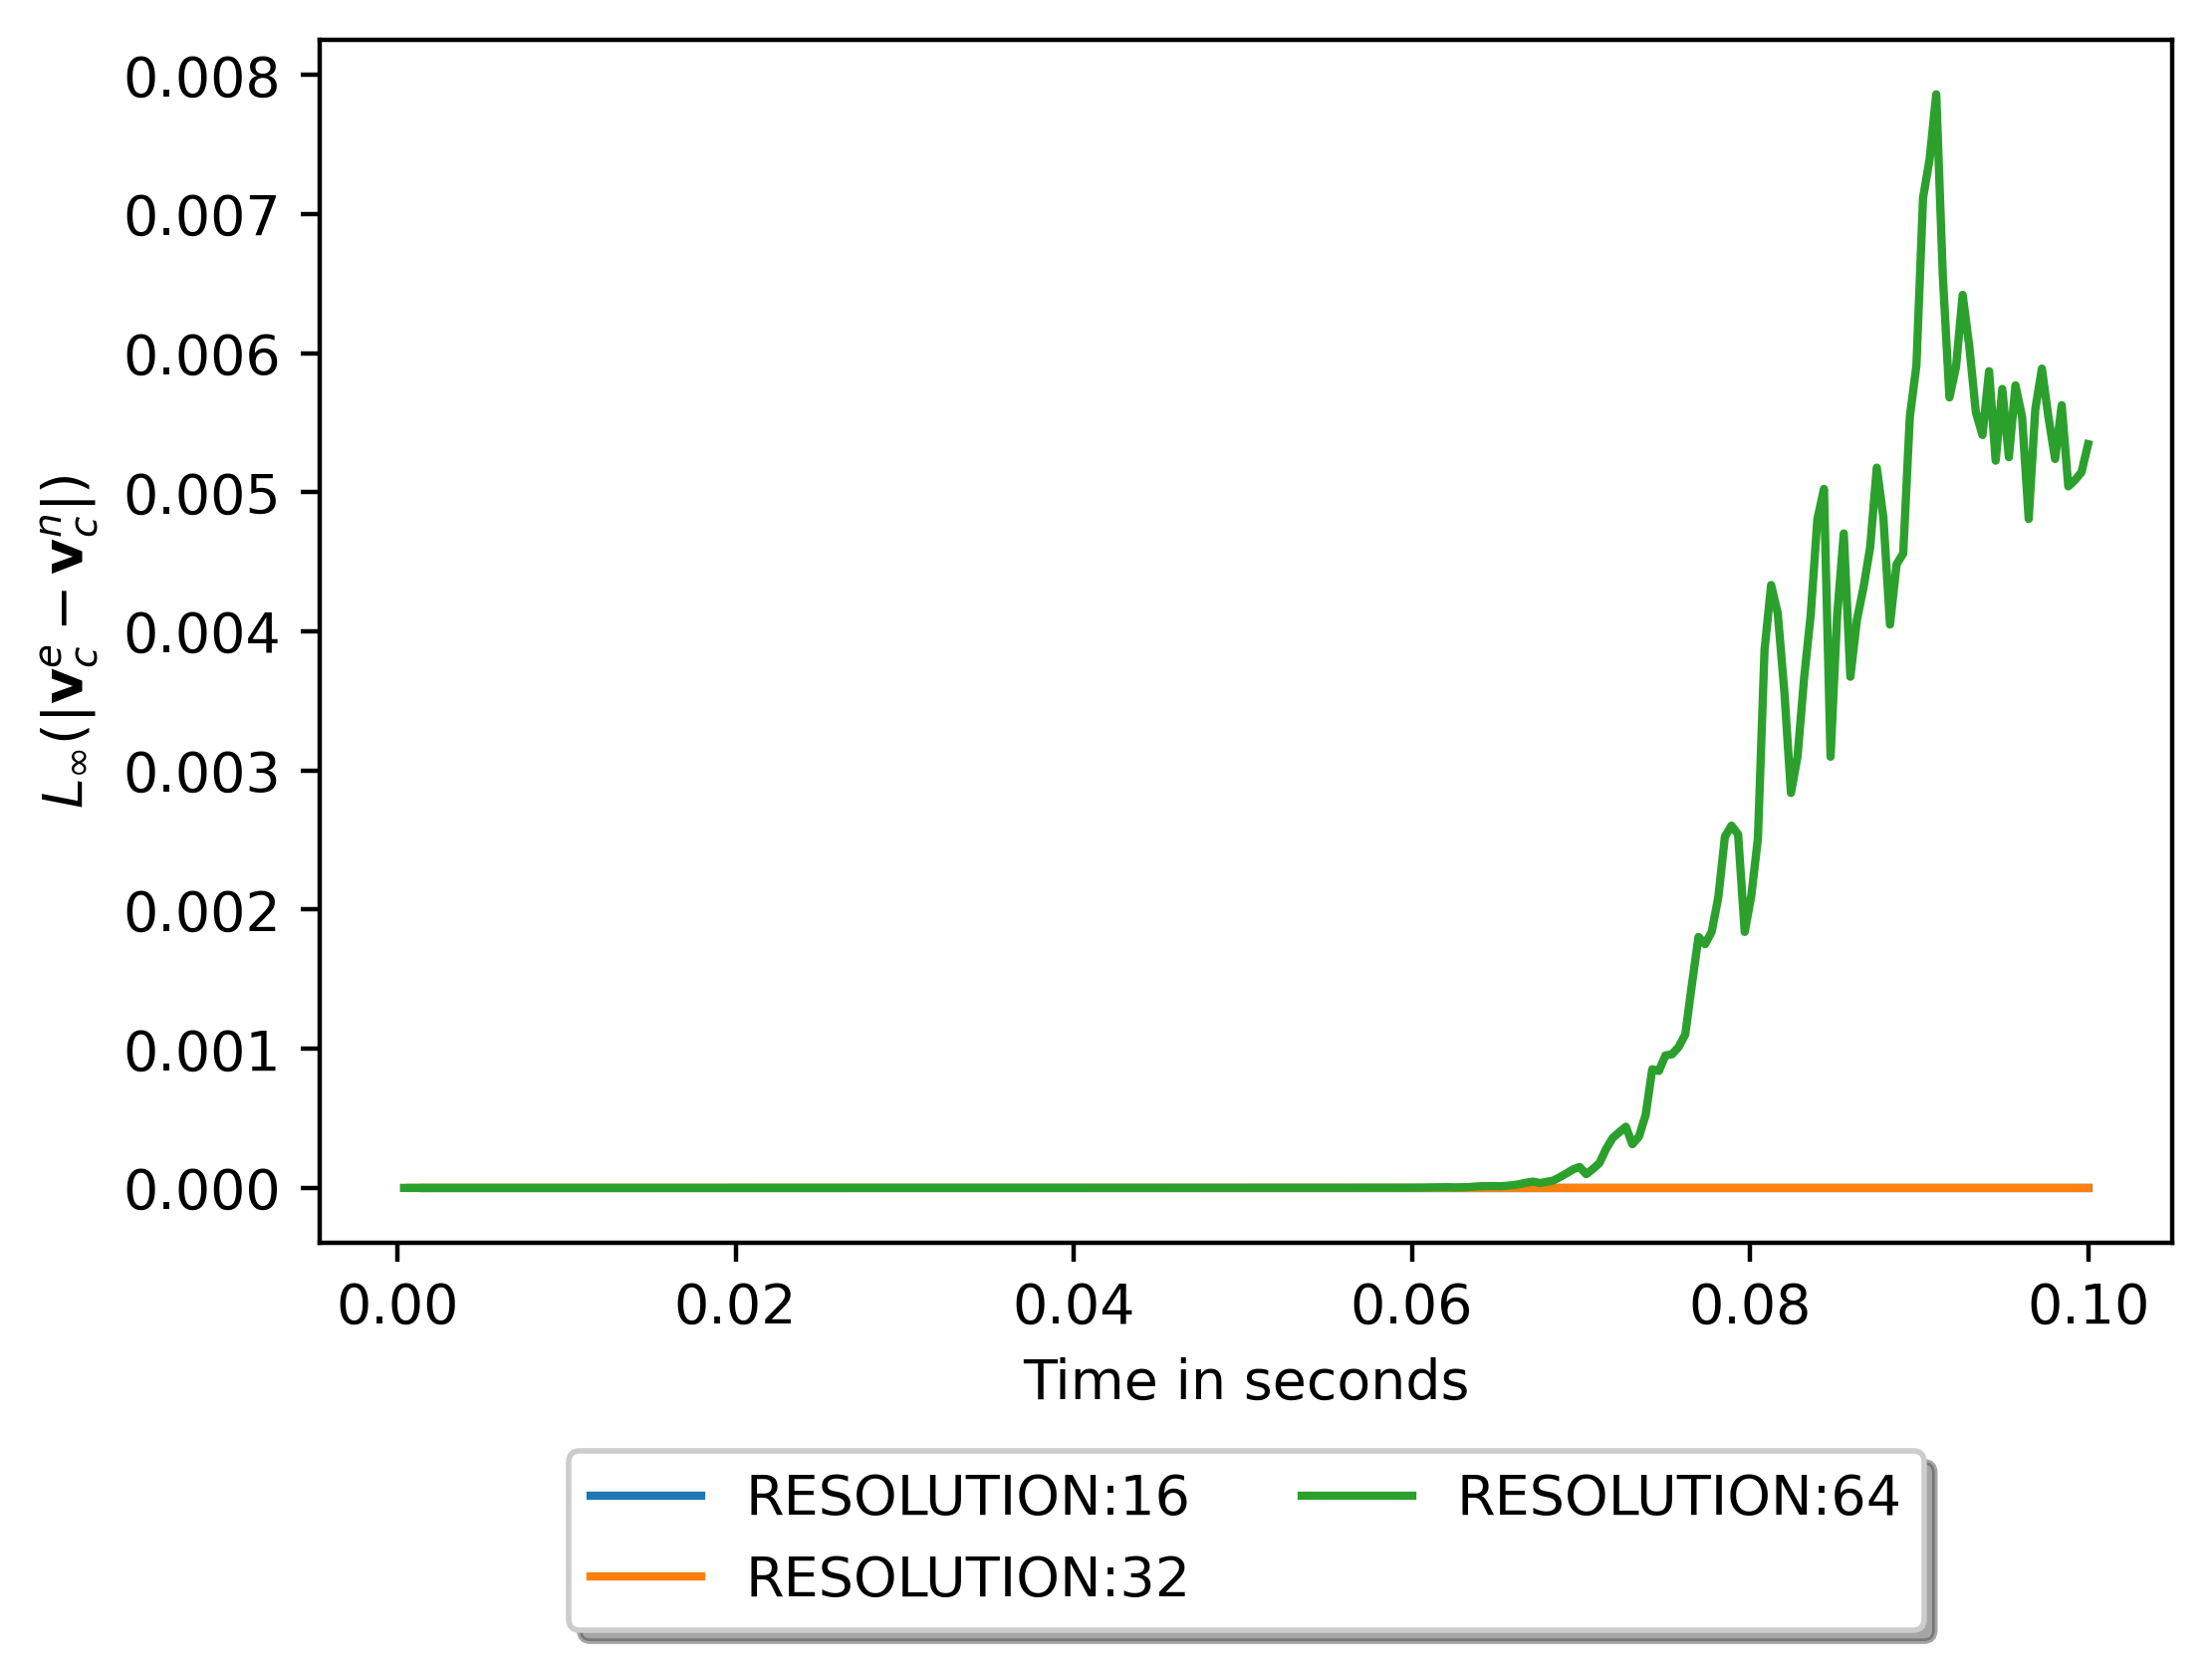

In [6]:
agglomerator = da.data_agglomerator("mercuryAirDropletTranslation.parameter","stationaryDropletResults.csv", 
                                     directory_pattern="interIsoRhoFoam-divRhoU-gaussLinear-mercuryAirDropletTranslation_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("interIsoRhoFoam.divRhoU-gaussLinear.mercuryAirDropletTranslation.csv")
dframe = agglomerator.study_dataframe()
plot_density_ratio_dframe(dframe)

## Water droplet in air 
### The 'interIsoFoam' solver

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[['boundary_R0p5_H2_C0p50p5.stl'], [0.000250001], [0.00050007], [0.0006250003], [0.0006250001], [0.1], [16, 32, 64], [0.01], [0.0], [0.0], [1.1839], [0.0], [997.05], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['surface_file', 'radius', 'z_centre', 'y_centre', 'x_centre', 'end_time', 'resolution', 'z_velocity', 'surface_tension_coefficient', 'nu_ambient', 'rho_ambient', 'nu_droplet', 'rho_droplet', 'step']


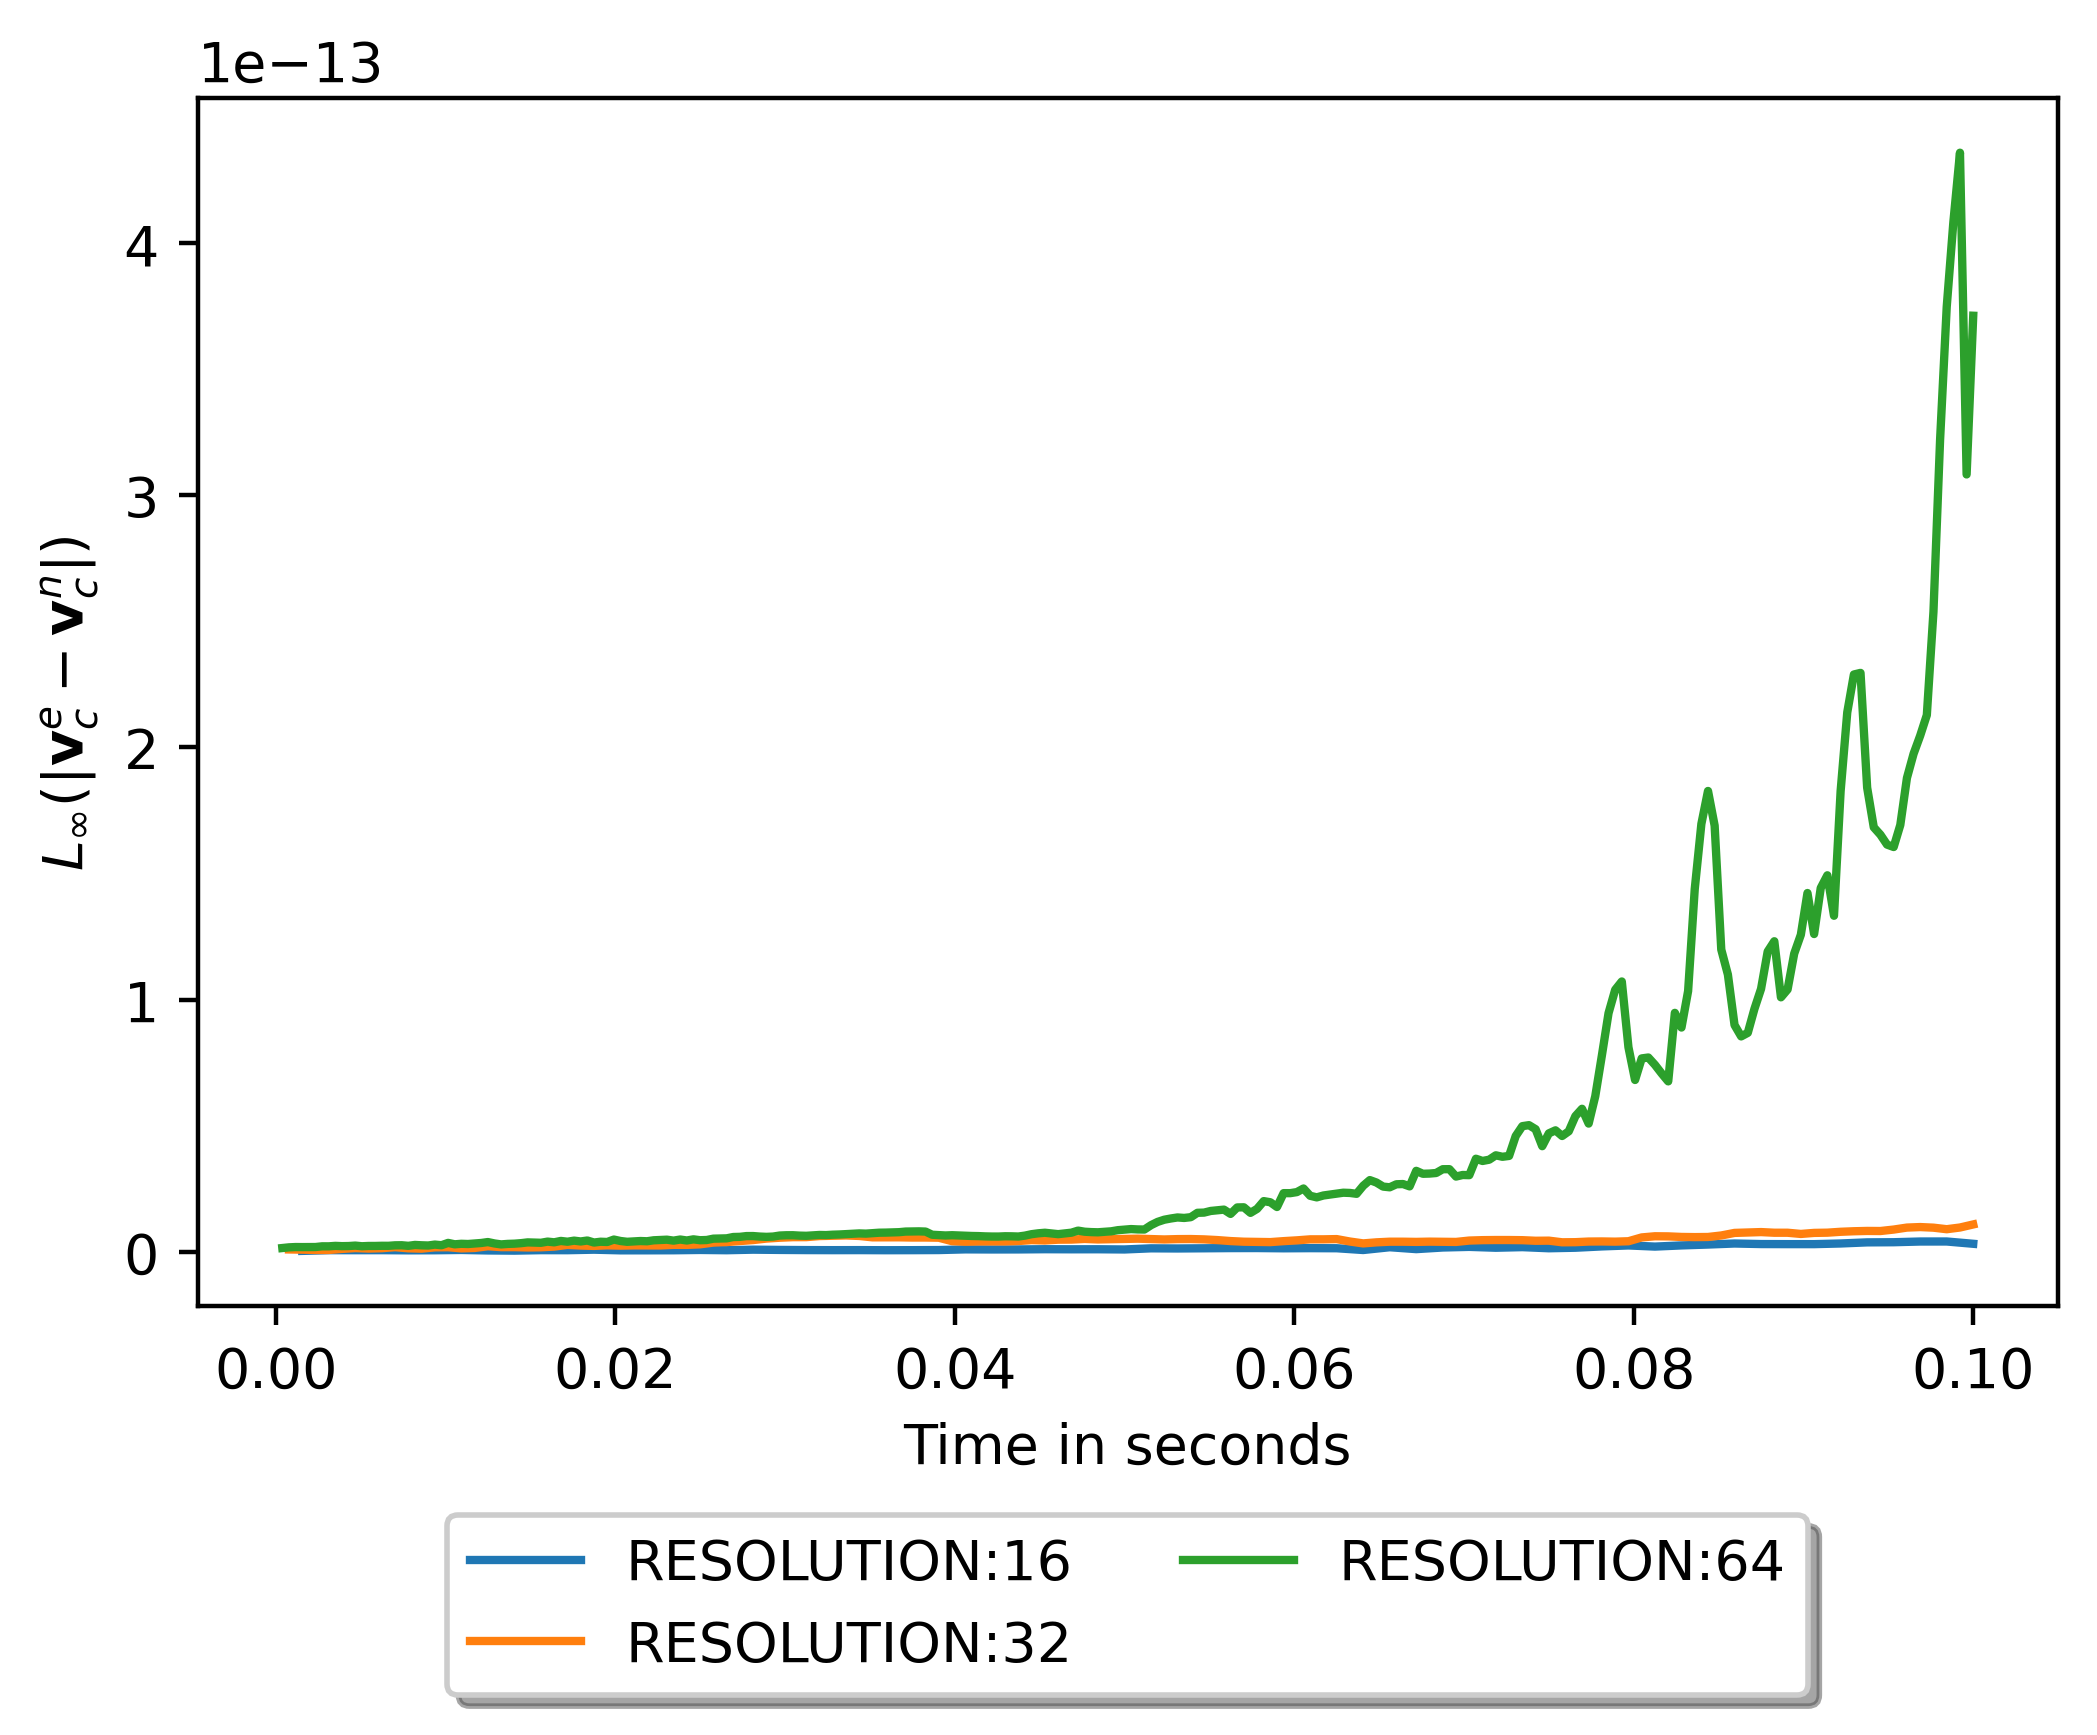

In [7]:
agglomerator = da.data_agglomerator("waterAirDropletTranslation.parameter","stationaryDropletResults.csv", 
                                     directory_pattern="interIsoFoam-waterAirDropletTranslation_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("interIsoFoam.waterAirDropletTranslation.csv")
dframe = agglomerator.study_dataframe()
plot_density_ratio_dframe(dframe)

### The 'interIsoRhoFoam' solver

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[['boundary_R0p5_H2_C0p50p5.stl'], [0.000250001], [0.00050007], [0.0006250003], [0.0006250001], [0.1], [16, 32, 64], [0.01], [0.0], [0.0], [1.1839], [0.0], [997.05], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['surface_file', 'radius', 'z_centre', 'y_centre', 'x_centre', 'end_time', 'resolution', 'z_velocity', 'surface_tension_coefficient', 'nu_ambient', 'rho_ambient', 'nu_droplet', 'rho_droplet', 'step']


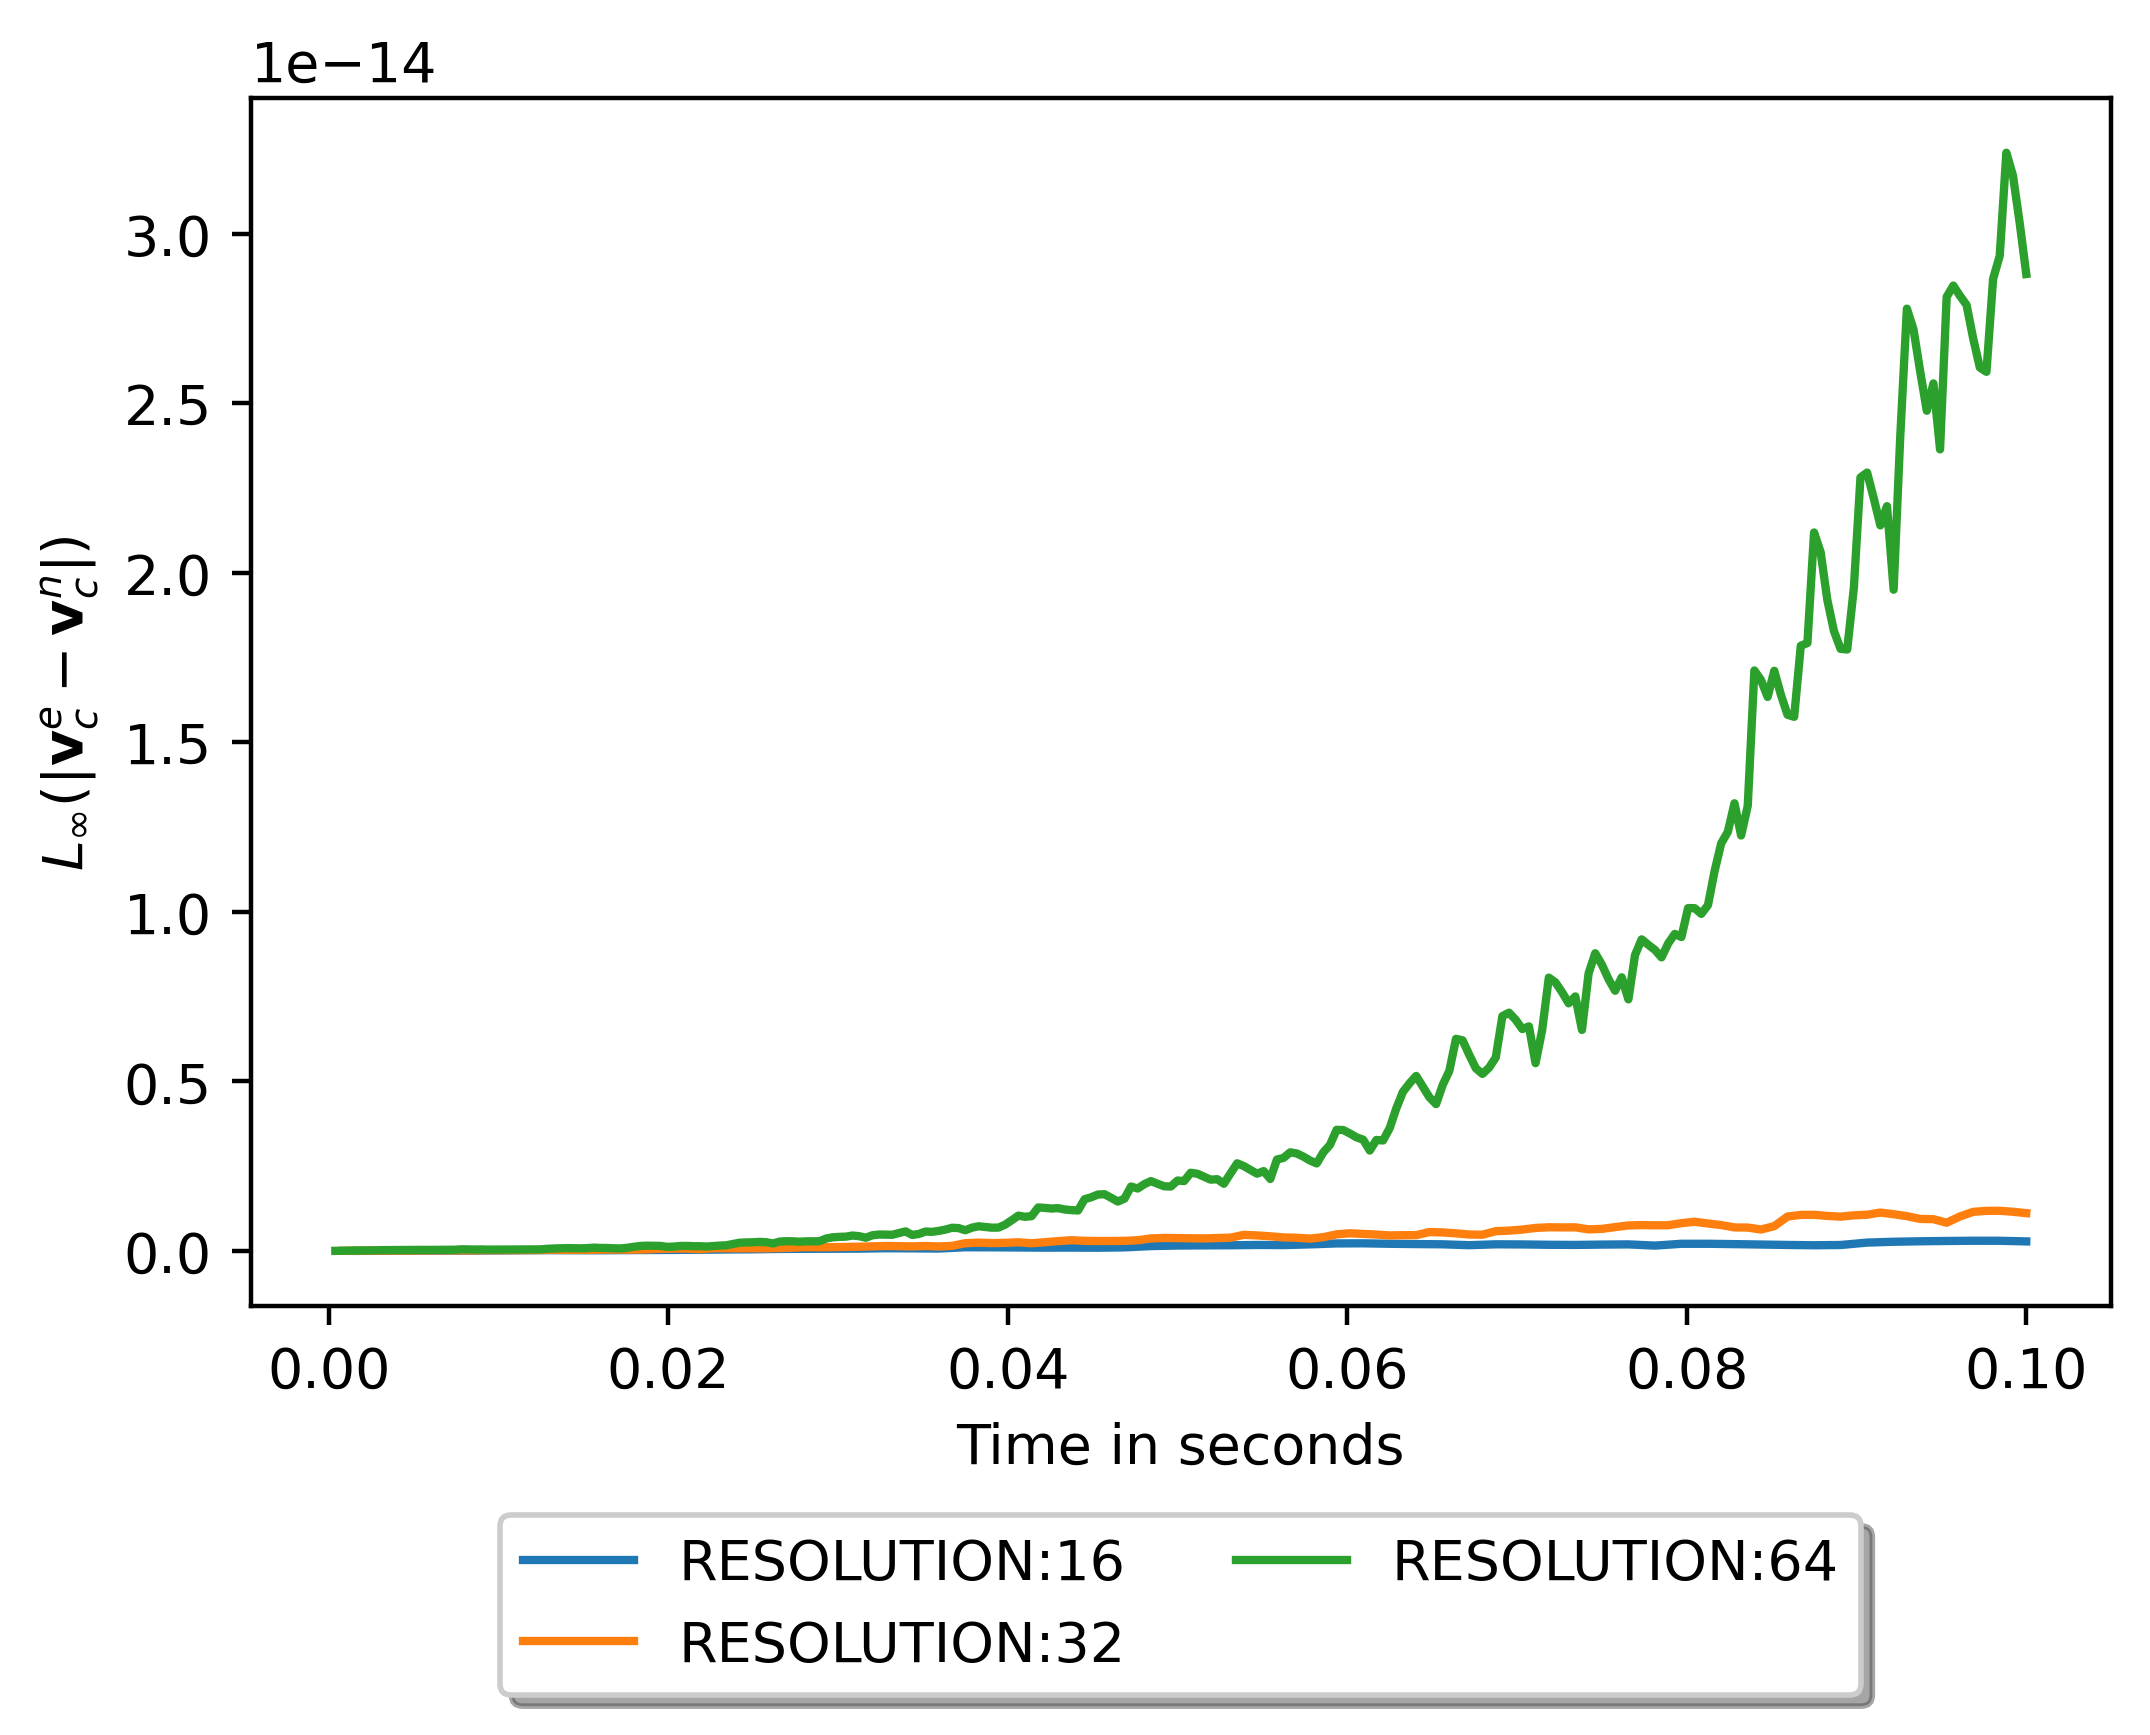

In [8]:
agglomerator = da.data_agglomerator("waterAirDropletTranslation.parameter","stationaryDropletResults.csv", 
                                     directory_pattern="interIsoRhoFoam-waterAirDropletTranslation_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("interIsoRhoFoam.mercuryAirDropletTranslation.csv")
dframe = agglomerator.study_dataframe()
plot_density_ratio_dframe(dframe)